## 활성화함수 구현하기

In [16]:
import numpy as np
x=np.array([-1.0, 2.0, 2.0])
x

array([-1.,  2.,  2.])

In [17]:
y=x>0
y

array([False,  True,  True], dtype=bool)

In [18]:
y= y.astype(np.int) #y의 원소를 bool에서 int형으로 변환
y

array([0, 1, 1])

그래프 그리기

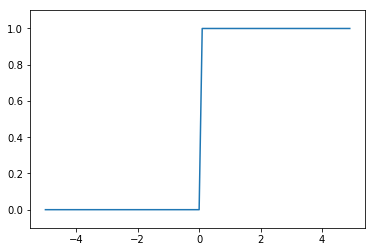

In [26]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
plt.show()

In [13]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

In [15]:
x=np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

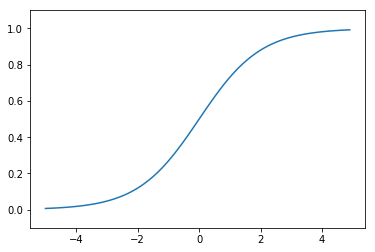

In [24]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))
x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y축의 범위 지정
plt.show()

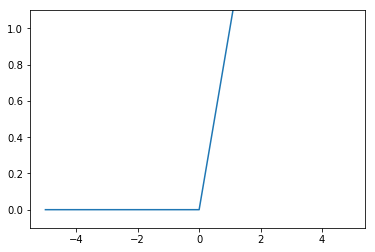

In [26]:
def relu(x):
    return np.maximum(0,x) #두값중 큰값을 선택반환
x=np.arange(-5.0, 5.0, 0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y축의 범위 지정
plt.show()

## 다차원 배열의 계산

In [27]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [30]:
np.ndim(A)

1

In [31]:
A.shape

(4,)

In [40]:
A.shape[0]

4

In [35]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [36]:
np.ndim(B)

2

$$B=\begin{pmatrix}
1&2\\
3&4\\
5&6
\end{pmatrix}$$

In [37]:
B.shape

(3, 2)

## 행렬의 내적(곱)

$$\begin{pmatrix}
1&2\\
3&4
\end{pmatrix} \begin{pmatrix}
5&6\\
7&8
\end{pmatrix} =\begin{pmatrix}
19&22\\
43&50
\end{pmatrix}$$


In [41]:
A=np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [42]:
B= np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [43]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

### 신경망내적 

X W = Y

2  2$\times$3   3

In [19]:
X=np.array([1,2])
X.shape

(2,)

In [20]:
W=np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [21]:
W.shape

(2, 3)

In [22]:
Y=np.dot(X,W) #np.dot 은 for문 없이 Y의 값이 여러개여도 한 번의 연산으로 가능
print(Y)

[ 5 11 17]


### Example 4 pixels 3 classes

In [48]:
X=np.array([56,231,24,2])
W=np.array([[0.2,-0.5,0.1,2.0],[1.5,1.3,2.1,0.0],[0,0.25,0.2,-0.3]])
X1=np.dot(W,X)
print(X1)

[ -97.9   434.7    61.95]


In [49]:
b=np.array([1.1,3.2,-1.2])
Y=X1+b
print(Y)

[ -96.8   437.9    60.75]


### 각 층의 신호 전달 구현

1계층.   $a_1 ^{(1)} = w_{11} ^{(1)}x_1 + w_{12} ^{(1)}x_2 + b_1 ^{(1)} $

행렬 내적 이용하여, '가중치 부분' 간소화하면 

$\mathbb{A^{(1)}} =  \ \mathbb{XW^{(1)}} + \mathbb{B^{(1)}}$

$\mathbb{A^{(1)}} (a_1 ^{(1)}  a_2 ^{(1)}  a_3 ^{(1)} )$, $\mathbb{X} = (x_1 x_2)$, $\mathbb{B^{(1)}} = (b_1 ^{(1)}  b_2 ^{(1)}  b_3 ^{(1)} )$

$\mathbb{W^{(1)}}\begin{pmatrix}
w_{11} ^{(1)}  & w_{21} ^{(1)} & w_{31} ^{(1)}\\
w_{12} ^{(1)}  & w_{22} ^{(1)} & w_{32} ^{(1)}
\end{pmatrix}$

In [54]:
X=np.array([1.0, 0.5])
W1=np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1=np.array([[0.1, 0.2, 0.3]])

print(W1.shape)  # (2,3)
print(X.shape)  # (2,)
print(B1.shape)  # (3,)
A1 = np.dot (X, W1) + B1 

(2, 3)
(2,)
(1, 3)


### 은닉층에서의 가중치 합을 활성화 함수: 시그모이드 함수 사용해서 적용

In [56]:
Z1=sigmoid(A1)
print(A1)
print(Z1)

[[ 0.3  0.7  1.1]]
[[ 0.57444252  0.66818777  0.75026011]]


### 1층에서 2층으로 신호 전달

In [60]:
W2=np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2=np.array([[0.1, 0.2]])

print(Z1.shape)  # (2,3)
print(W2.shape)  # (2,)
print(B2.shape)  # (3,)

A2 = np.dot (Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(1, 3)
(3, 2)
(1, 2)
[[ 0.51615984  1.21402696]]
[[ 0.62624937  0.7710107 ]]


### 2층에서 출력층으로의 신호 전달

In [61]:
def identity_function(x):
    return x

W3=np.array([[0.1,0.3], [0.2,0.4]])
B3=np.array([[0.1, 0.2]])

A3 = np.dot (Z2, W3) + B3
Y = identity_function(A3) 

print(A3)
print(Y)

[[ 0.31682708  0.69627909]]
[[ 0.31682708  0.69627909]]


### 구현정리

In [62]:
def init_network():
    network ={}
    network['W1'] = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
    network['b1'] = np.array([[0.1, 0.2, 0.3]])
    network['W2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([[0.1, 0.2]])
    network['W3'] = np.array([[0.1,0.3], [0.2,0.4]])
    network['b3'] = np.array([[0.1, 0.2]])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 =sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 =sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

network =init_network()
x = np.array([1.0 ,0.5])
y = forward(network, x)
print(y)

[[ 0.31682708  0.69627909]]
